<a href="https://colab.research.google.com/github/fedepicado/Algoritmos-de-ordenamiento/blob/main/eda_estudiantes_aa_picha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
usuario = 'picha'
#fedeF CFG
match usuario:
    case 'nahuel':
        print("Opción A seleccionada")
    case 'picha':
        base_picha= "/content/drive/MyDrive/Maestria/AA/"
    case 'fedeF':
        base_path = '/content/drive/MyDrive/aprendizaje_automatico/'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, confusion_matrix,f1_score,roc_auc_score,roc_curve,mean_squared_error,mean_absolute_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_file = 'dataset_TP1_final.csv'
df_estudiantes = pd.read_csv(base_picha+dataset_file)

<ipython-input-40-4bd95b19f9e7>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estudiantes = pd.read_csv(base_picha+dataset_file)


# Analisis exploratorio

In [ ]:
df_estudiantes.head(5)

,id,Estado Civil,Orden de prioridad,Carrera,Asistencia diurna/nocturna,Estudios máximos antes de la inscripción,Cualificación promedio de estudios previos,Estudios de la Madre,Estudios del Padre,Ocupación de la Madre,...,Unidades curriculares 2do semestre (acreditadas),Unidades curriculares 2do semestre (inscrito),Cantidad de evaluaciones en el 2do semestre,Unidades curriculares 2do semestre (aprobadas),Nota promedio en el 2do semestre,Unidades curriculares 2do semestre (sin evaluaciones),Tasa de desempleo en el momento de inscrición,Inflación en el momento de inscrición,Cambio annual del PBI en el momento de inscrición,Target
0,0,1,1,Derecho,1,1,66,1,19,5,...,0,6,7,6,62,0,11.1,0.6,2.02,Graduado
1,1,1,1,Derecho,1,1,66,19,19,9,...,0,6,9,0,0,0,11.1,0.6,2.02,Desertor
2,2,1,2,Turismo,1,1,72,3,19,2,...,0,6,0,0,0,0,16.2,0.3,-0.92,Desertor
3,3,1,3,Enfermería,1,1,69,19,3,3,...,0,8,11,7,64,0,11.1,0.6,2.02,En Curso
4,4,1,2,Enfermería,1,1,69,19,37,4,...,0,7,12,6,65,0,7.6,2.6,0.32,Graduado


In [ ]:
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     76518 non-null  int64  
 1   Estado Civil                                           76518 non-null  int64  
 2   Orden de prioridad                                     76518 non-null  int64  
 3   Carrera                                                76518 non-null  object 
 4   Asistencia diurna/nocturna                             76518 non-null  int64  
 5   Estudios máximos antes de la inscripción               76518 non-null  int64  
 6   Cualificación promedio de estudios previos             76518 non-null  int64  
 7   Estudios de la Madre                                   76518 non-null  int64  
 8   Estudios del Padre                            

analisis de target

In [ ]:
df_estudiantes['Target'].value_counts()

,count
Target,
Graduado,36282
Desertor,25296
En Curso,14940


<Axes: ylabel='count'>

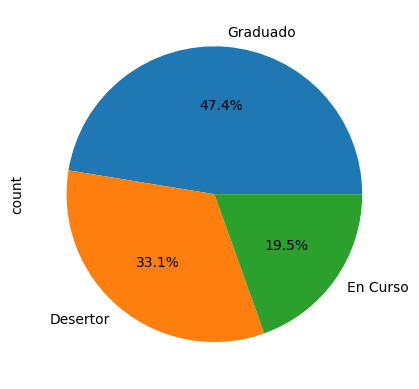

In [ ]:
#hacer el grafico de torta
df_estudiantes['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')

lo que vamos a ver, en curso pordia ser a predecir

<Axes: ylabel='count'>

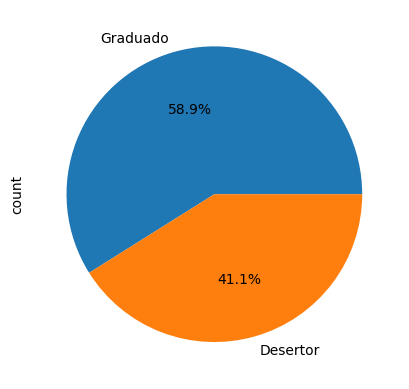

In [ ]:
df_estudiantes[df_estudiantes['Target'] != 'En Curso']['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df_estudiantes['Carrera'].value_counts().style.background_gradient(cmap='viridis')

AttributeError: 'Series' object has no attribute 'style'

<Axes: xlabel='Target', ylabel='Orden de prioridad'>

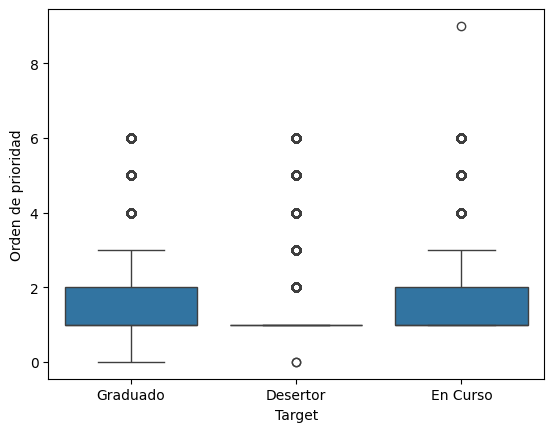

In [ ]:
#hacer un grafico boxplot de la distribucion de la columna 'orden de prioridad' pero dividida por el target
sns.boxplot(x='Target', y='Orden de prioridad', data=df_estudiantes)


In [ ]:
columnas_binarias = ['Asistencia diurna/nocturna','Estudiante Internacional','Necesita mudarse','Necesidades educativas especiales','Tiene deuda','Pago de matrícula al día','Sexo','Poseedor de Beca']

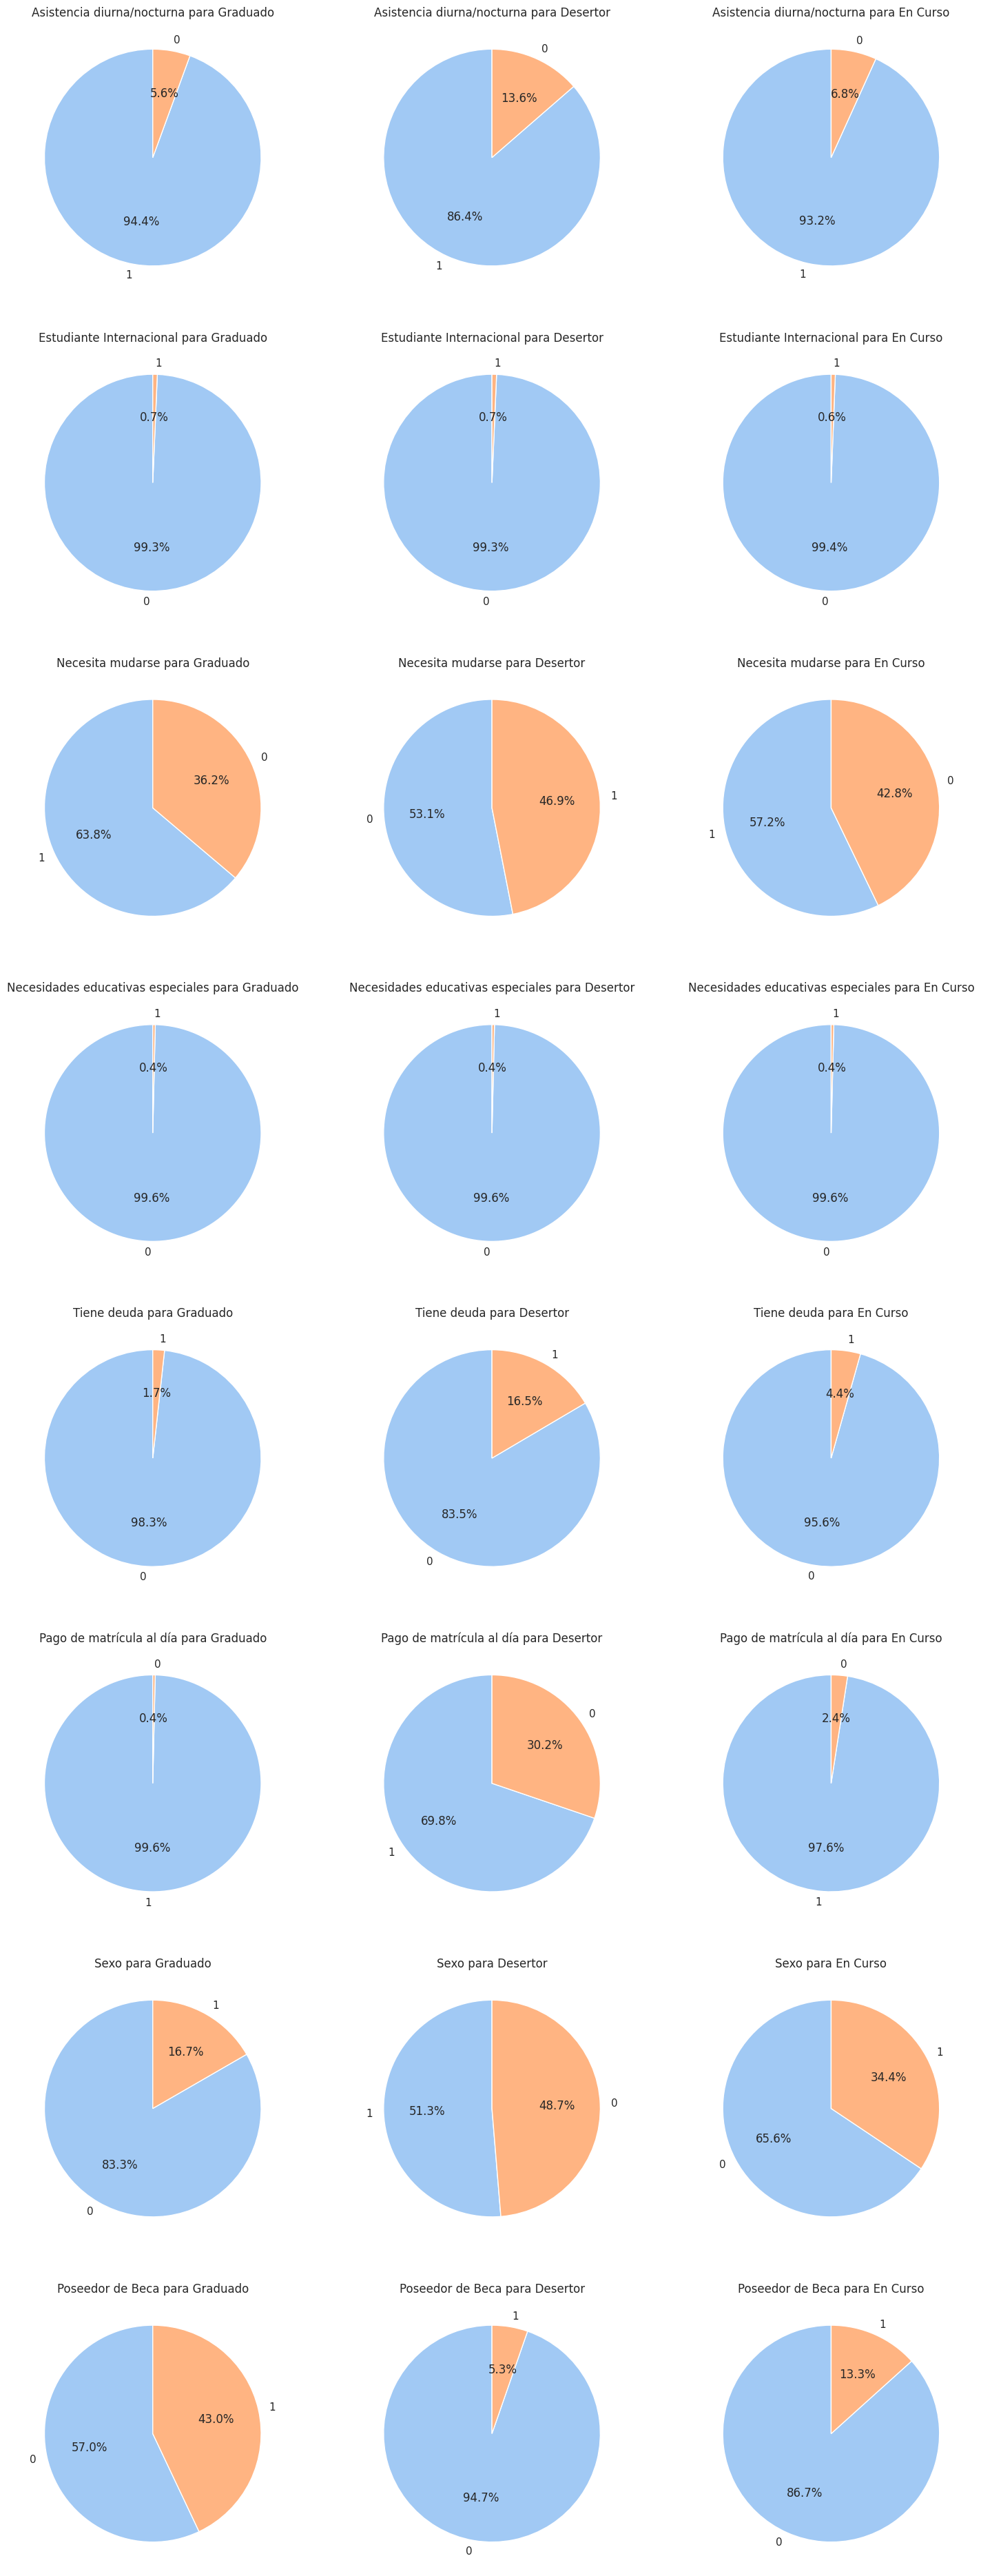

In [ ]:
sns.set(style="whitegrid")

# Lista de categorías de 'target'
targets = df_estudiantes['Target'].unique()

# Crear la figura con subplots
fig, axes = plt.subplots(len(columnas_binarias), len(targets), figsize=(18, 6 * len(columnas_binarias)))

# Crear gráficos de torta para cada columna binaria y cada target
for row, element in enumerate(columnas_binarias):
    for col, target in enumerate(targets):
        # Filtrar el DataFrame por el valor del 'target'
        subset = df_estudiantes[df_estudiantes['Target'] == target]

        # Calcular la distribución de la columna binaria
        asistencia_counts = subset[element].value_counts()

        # Crear el gráfico de torta
        axes[row, col].pie(asistencia_counts, labels=asistencia_counts.index, autopct='%1.1f%%', startangle=90,
                           colors=sns.color_palette("pastel")[0:len(asistencia_counts)])
        axes[row, col].set_title(f'{element} para {target}')


In [ ]:
columnas_int = ['Orden de prioridad','Cualificación promedio de estudios previos','Edad al momento de la inscripción','Unidades curriculares 1er semestre (acreditadas)','Unidades curriculares 1er semestre (inscrito)','Cantidad de evaluaciones en el 1er semestre','Unidades curriculares 1er semestre (aprobadas)','Nota promedio en el 1er semestre','Unidades curriculares 1er semestre (sin evaluaciones)','Unidades curriculares 2do semestre (acreditadas)','Unidades curriculares 2do semestre (inscrito)','Unidades curriculares 2do semestre (aprobadas)','Nota promedio en el 2do semestre','Unidades curriculares 2do semestre (sin evaluaciones)']

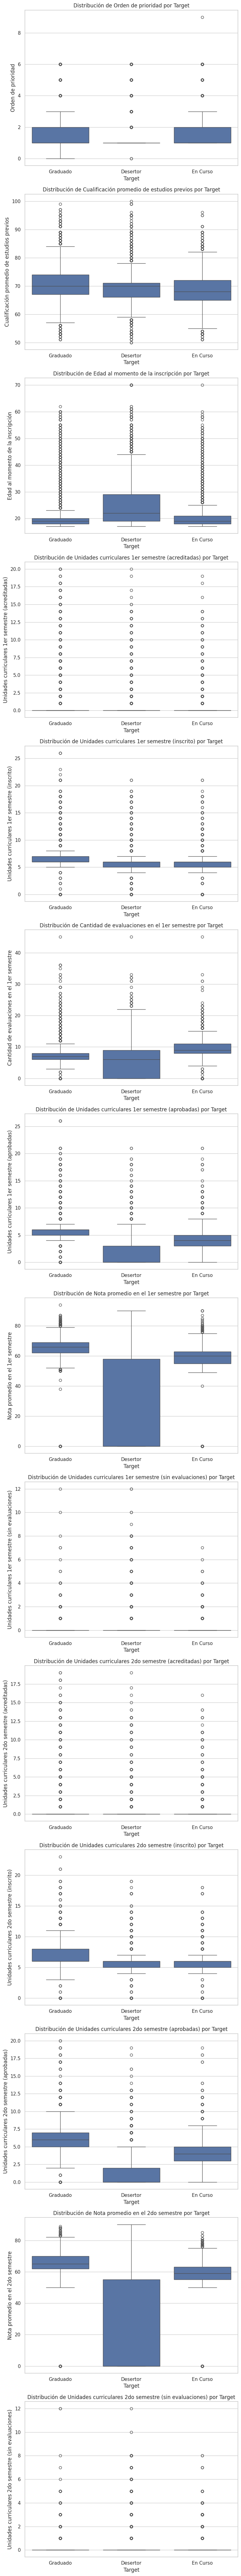

In [ ]:
# Crear la figura con subplots
fig, axes = plt.subplots(len(columnas_int), 1, figsize=(8, 6 * len(columnas_int)))

# Si hay solo una columna, axes no será un array, así que lo convertimos en uno
if len(columnas_int) == 1:
    axes = [axes]

# Crear boxplots para cada columna
for i, col in enumerate(columnas_int):
    sns.boxplot(x='Target', y=col, data=df_estudiantes, ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por Target')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
columnas_float = ['Tasa de desempleo en el momento de inscrición','Tasa de desempleo en el momento de egreso','Cambio annual del PBI en el momento de inscrición']


In [ ]:
# Crear la figura con subplots
fig, axes = plt.subplots(len(columnas_float), 1, figsize=(8, 6 * len(columnas_float)))

if len(columnas_float) == 1:
    axes = [axes]

# Crear boxplots para cada columna
for i, col in enumerate(columnas_float):
    sns.boxplot(x='Target', y=col, data=df_estudiantes, ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por Target')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Creacion target binario

In [ ]:
df_estudiantes["Target"].value_counts()

,count
Target,
Graduado,36282
Desertor,25296
En Curso,14940


In [ ]:
data=df_estudiantes.copy()

In [ ]:
data.loc[data["Carrera"] == "39"]

,id,Estado Civil,Orden de prioridad,Carrera,Asistencia diurna/nocturna,Estudios máximos antes de la inscripción,Cualificación promedio de estudios previos,Estudios de la Madre,Estudios del Padre,Ocupación de la Madre,...,Unidades curriculares 2do semestre (acreditadas),Unidades curriculares 2do semestre (inscrito),Cantidad de evaluaciones en el 2do semestre,Unidades curriculares 2do semestre (aprobadas),Nota promedio en el 2do semestre,Unidades curriculares 2do semestre (sin evaluaciones),Tasa de desempleo en el momento de inscrición,Inflación en el momento de inscrición,Cambio annual del PBI en el momento de inscrición,Target
67273,67273,2,1,39,1,1,74,19,38,90,...,0,5,5,0,0,0,12.7,3.7,-1.7,Desertor


In [ ]:
data = data.loc[~data["Carrera"].isin(["979", "39"])]

In [ ]:
data["Target_binario"] = data["Target"].map({"Desertor": 1}).fillna(0)


## Seleccion de variables

HEatmap para ver correlacion de las variables continuas

In [ ]:
se_van_continuas=['Tasa de desempleo en el momento de inscrición',
       'Inflación en el momento de inscrición',
       'Cambio annual del PBI en el momento de inscrición']

In [ ]:
#variables continuas que se van
data.drop(se_van_continuas, axis=1, inplace=True)

In [ ]:
## otras variables que se van:
otras=["id","Target"]
data.drop(otras, axis=1, inplace=True)

In [ ]:
# Asegúrate de que la lista de variables esté correctamente definida
categorical_variables_list = [
    'Carrera',
    'Estado Civil',
    'Estudios máximos antes de la inscripción',
    'Estudios de la Madre',
    'Ocupación de la Madre',
    'Estudios del Padre',
    'Ocupación del Padre'
]

# Convertir a strings las columnas categóricas (si es necesario)
for col in categorical_variables_list:
    data[col] = data[col].astype(str)

# Aplicar get_dummies para las variables categóricas
data = pd.get_dummies(data, columns=categorical_variables_list)

In [ ]:
data.columns

Index(['Orden de prioridad', 'Asistencia diurna/nocturna',
       'Cualificación promedio de estudios previos',
       'Puntaje en examen de ingreso', 'Necesita mudarse',
       'Necesidades educativas especiales', 'Tiene deuda',
       'Pago de matrícula al día', 'Sexo', 'Poseedor de Beca',
       ...
       'Ocupación del Padre_4', 'Ocupación del Padre_5',
       'Ocupación del Padre_6', 'Ocupación del Padre_7',
       'Ocupación del Padre_8', 'Ocupación del Padre_9',
       'Ocupación del Padre_90', 'Ocupación del Padre_96',
       'Ocupación del Padre_99', 'Ocupación del Padre_Diseño Multimedia'],
      dtype='object', length=237)

# Separacion de los datos

In [ ]:
X = data.drop('Target_binario', axis=1)
y = data['Target_binario']

#### escalar X importantisimo
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Primero, dividir en conjunto de entrenamiento + validación y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=321)

# # Luego, dividir el conjunto de entrenamiento + validación en entrenamiento y validación
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=321)

# Regresion Logistica

## Entreno el modelo

In [ ]:
param_range = np.logspace(-4, 4, 20)

accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)  # Para AUC necesitas usar predict_proba
logloss_scorer = make_scorer(log_loss, needs_proba=True, greater_is_better=False)  # Log loss necesita probas

# Diccionario de scoring
scoring = {
    'accuracy': accuracy_scorer,
    'recall': recall_scorer,
    'precision': precision_scorer,
    'f1_score': f1_scorer,
    'roc_auc': roc_auc_scorer,
    'log_loss': logloss_scorer
}

# Configurar StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=321, shuffle=True)

# Almacenar los resultados para cada métrica
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []
logloss_scores = []

# Probar con diferentes valores de C
for C in param_range:
    modelo_RL = LogisticRegression(C=C, penalty='l2', solver='liblinear', max_iter=4000, random_state=321)

    # Realizar validación cruzada con todas las métricas
    scores = cross_validate(modelo_RL, X_train, y_train, cv=skf, scoring=scoring)

    # Almacenar los resultados promedio para cada métrica
    accuracy_scores.append(np.mean(scores['test_accuracy']))
    recall_scores.append(np.mean(scores['test_recall']))
    precision_scores.append(np.mean(scores['test_precision']))
    f1_scores.append(np.mean(scores['test_f1_score']))
    roc_auc_scores.append(np.mean(scores['test_roc_auc']))
    logloss_scores.append(np.mean(scores['test_log_loss']))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [ ]:
# Crear un DataFrame con las métricas para cada valor de C
metrics_train_RL = pd.DataFrame({
    'C': param_range,
    'Accuracy': accuracy_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores,
    'Log Loss': logloss_scores
})

# Mostrar el DataFrame con las métricas
print(metrics_train_RL)

               C  Accuracy    Recall  Precision  F1 Score   ROC AUC  Log Loss
0       0.000100  0.905248  0.905248   0.904862  0.903872  0.945700 -0.325820
1       0.000264  0.908123  0.908123   0.908067  0.906622  0.950254 -0.278710
2       0.000695  0.909206  0.909206   0.909190  0.907723  0.952532 -0.254149
3       0.001833  0.910271  0.910271   0.910190  0.908872  0.953404 -0.243936
4       0.004833  0.910663  0.910663   0.910450  0.909374  0.953627 -0.240526
5       0.012743  0.911129  0.911129   0.910857  0.909907  0.953523 -0.239791
6       0.033598  0.911073  0.911073   0.910747  0.909897  0.953371 -0.239921
7       0.088587  0.910887  0.910887   0.910537  0.909723  0.953226 -0.240254
8       0.233572  0.910924  0.910924   0.910566  0.909769  0.953108 -0.240592
9       0.615848  0.910980  0.910980   0.910623  0.909826  0.953026 -0.240856
10      1.623777  0.911017  0.911017   0.910662  0.909864  0.952946 -0.241129
11      4.281332  0.910999  0.910999   0.910642  0.909846  0.952

In [ ]:
# Entrenar el modelo final con el mejor valor de C
best_C_RL = param_range[np.argmax(accuracy_scores)]  #Me baso en acuraccy
modelo_final_RL = LogisticRegression(C=best_C_RL, penalty='l2', solver='liblinear', max_iter=4000, random_state=321)
modelo_final_RL.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, max_iter=4000, random_state=321,
                   solver='liblinear')

In [ ]:
# Predecir en el conjunto de validación
y_pred_RL = modelo_final_RL.predict(X_test)
y_pred_proba_RL = modelo_final_RL.predict_proba(X_test)[:, 1]  # Para calcular el AUC y log-loss

# Calcular las métricas
accuracy_RL = accuracy_score(y_test, y_pred_RL)
roc_auc_RL = roc_auc_score(y_test, y_pred_proba_RL)
precision_RL = precision_score(y_test, y_pred_RL)
recall_RL = recall_score(y_test, y_pred_RL)
f1_RL = f1_score(y_test, y_pred_RL)
logloss_RL = log_loss(y_test, y_pred_proba_RL)
cm_RL = confusion_matrix(y_test, y_pred_RL)

# Crear un DataFrame con las métricas
metrics_RL = {
    "C": [best_C_RL],
    "Accuracy": [accuracy_RL],
    "Precision": [precision_RL],
    "Recall": [recall_RL],
    "F1 Score": [f1_RL],
    "Log Loss": [logloss_RL],
    "AUC": [roc_auc_RL]
}

metrics_df_RL = pd.DataFrame(metrics_RL)
metrics_df_RL

,C,Accuracy,Precision,Recall,F1 Score,Log Loss,AUC
0,0.012743,0.905772,0.894316,0.810754,0.850487,0.250007,0.950694


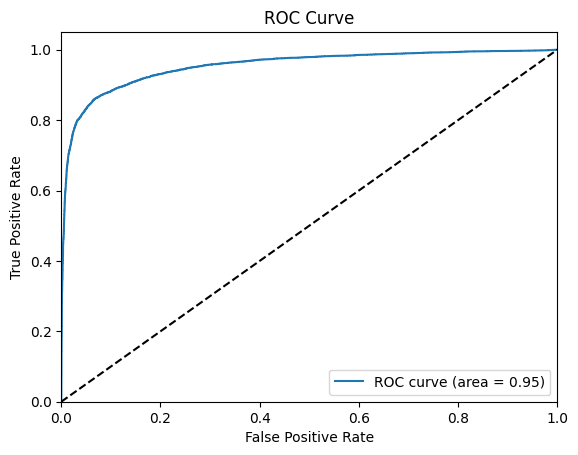

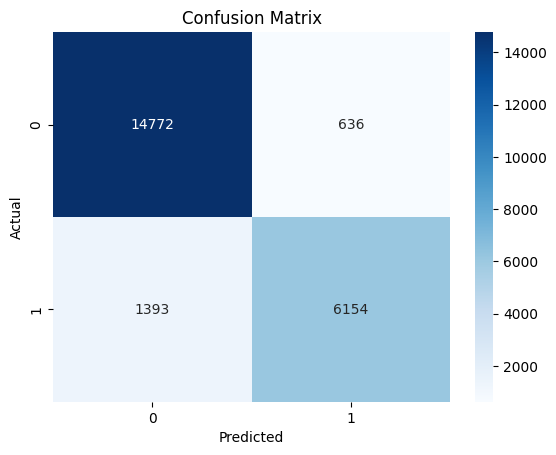

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_RL)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_RL:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(cm_RL, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Curva de complejidad

Train mean scores: [0.905841   0.90865555 0.91010717 0.91133474 0.91210022 0.91265566
 0.91260432 0.91254364 0.91257165 0.91254364 0.91253431 0.91252964
 0.91253897 0.91253897 0.91254364 0.91254364 0.91254831 0.91254364
 0.91254364 0.91254831]
Validation mean scores: [0.90536019 0.90784335 0.90941167 0.91038251 0.91112932 0.91126002
 0.91140939 0.91120402 0.91127871 0.91114802 0.91111068 0.91105468
 0.91105468 0.91105468 0.91105468 0.91105468 0.91105468 0.91105468
 0.91105468 0.91105468]


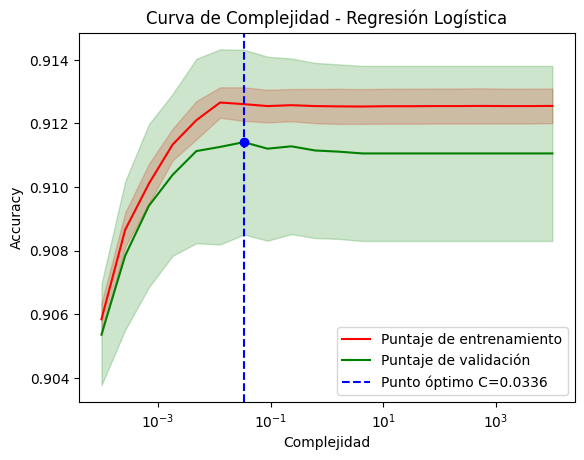

In [ ]:
# Definir un rango más razonable para C
param_range = np.logspace(-4, 4, 20)

# Usar un solver adecuado y aumentar max_iter
model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=4000, random_state=321)

# Obtener las curvas de validación
train_scores, val_scores = validation_curve(
    model, X_train, y_train, param_name="C",
    param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

# Calcular promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Imprimir los puntajes para inspección
print("Train mean scores:", train_mean)
print("Validation mean scores:", val_mean)

optimal_idx = np.argmax(val_mean)

# Plot the complexity curve
plt.figure()
plt.semilogx(param_range, train_mean, label="Puntaje de entrenamiento", color="r")
plt.fill_between(param_range, np.array(train_mean) - train_std, np.array(train_mean) + train_std, color="r", alpha=0.2)
plt.semilogx(param_range, val_mean, label="Puntaje de validación", color="g")
plt.fill_between(param_range, np.array(val_mean) - val_std, np.array(val_mean) + val_std, color="g", alpha=0.2)

# Mark the optimal point
plt.axvline(param_range[optimal_idx], color='b', linestyle='--', label=f'Punto óptimo C={param_range[optimal_idx]:.4f}')
plt.scatter(param_range[optimal_idx], val_mean[optimal_idx], color='b', zorder=5)

plt.title("Curva de Complejidad - Regresión Logística")
plt.xlabel("Complejidad")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## Optimizacion con gridSearch

In [ ]:
# Valor óptimo encontrado para el parámetro C
C_optimo = 0.0336  # Reemplaza este valor por el que hayas encontrado

# Definir los parámetros para GridSearch, eliminando C
param_grid = {
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'solver': ['liblinear', 'saga'],  # Algoritmos de optimización
    'max_iter': [100],  # Iteraciones máximas
    'class_weight': [None, 'balanced'],  # Pesos de clases
    'tol': [1e-4, 1e-5]  # Tolerancia
}

# Definir el modelo con el valor fijo de C
modelo_RL = LogisticRegression(C=C_optimo, random_state=321)

# Crear GridSearchCV, sin optimizar C
grid_search_RL = GridSearchCV(estimator=modelo_RL, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Ajustar el modelo
grid_search_RL.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados (sin C)
print("Mejores parámetros encontrados:", grid_search_RL.best_params_)

# Modelo final con los mejores parámetros
modelo_optimizado_RL = grid_search_RL.best_estimator_

Mejores parámetros encontrados: {'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


{'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} parametros encontrados para RL

# SVM

## Entreno el modelo

In [ ]:
# Definir los "scorers"
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)  # SVM requiere usar probabilidades con una opción
logloss_scorer = make_scorer(log_loss, needs_proba=True, greater_is_better=False)

# Diccionario de scoring
scoring = {
    'accuracy': accuracy_scorer,
    'recall': recall_scorer,
    'precision': precision_scorer,
    'f1_score': f1_scorer,
    'roc_auc': roc_auc_scorer,
    'log_loss': logloss_scorer
}

# Configurar StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=321, shuffle=True)

# Almacenar los resultados para cada métrica
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []
logloss_scores = []

# Rango de valores de C
param_range = np.logspace(-4, 4, 20)

# Probar con diferentes valores de C
for C in param_range:
    # Iniciar el modelo SVM con probabilidades
    modelo_SVM = SVC(C=C, kernel='linear', probability=True, random_state=321)

    # Realizar validación cruzada con todas las métricas
    scores = cross_validate(modelo_SVM, X_train, y_train, cv=skf, scoring=scoring)

    # Almacenar los resultados promedio para cada métrica
    accuracy_scores.append(np.mean(scores['test_accuracy']))
    recall_scores.append(np.mean(scores['test_recall']))
    precision_scores.append(np.mean(scores['test_precision']))
    f1_scores.append(np.mean(scores['test_f1_score']))
    roc_auc_scores.append(np.mean(scores['test_roc_auc']))
    logloss_scores.append(np.mean(scores['test_log_loss']))

# Crear un DataFrame con las métricas para cada valor de C
metrics_df_SVM = pd.DataFrame({
    'C': param_range,
    'Accuracy': accuracy_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores,
    'Log Loss': logloss_scores
})

# Mostrar el DataFrame con las métricas
print(metrics_df_SVM)

In [ ]:
# Entrenar el modelo final con el mejor valor de C
best_C_SVM = param_range[np.argmax(accuracy_scores)]  #Me baso en acuraccy
modelo_SVM = SVC(C=best_C_SVM, kernel='linear', probability=True, random_state=321)
modelo_SVM.fit(X_train, y_train)

In [ ]:
# Predecir en el conjunto de validación
y_pred_SVM = modelo_SVM.predict(X_test)
y_pred_proba_SVM = modelo_SVM.predict_proba(X_test)[:, 1]  # Para calcular el AUC y log-loss

# Calcular las métricas
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
roc_auc_SVM = roc_auc_score(y_test, y_pred_proba_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)
logloss_SVM = log_loss(y_test, y_pred_proba_SVM)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

metrics_SMV = {
    "Accuracy": [accuracy_SVM],
    "Precision": [precision_SVM],
    "Recall": [recall_SVM],
    "F1 Score": [f1_SVM],
    "Log Loss": [logloss_SVM],
    "AUC": [roc_auc_SVM]
}

metrics_SMV = pd.DataFrame(metrics_SMV)
metrics_SMV## para comparar con el test

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_SVM)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_SVM:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Curva de complejidad

In [ ]:
# Definir un rango para el parámetro C
param_range = np.logspace(-4, 4, 20)

# Definir el modelo SVM con kernel lineal y probability=True para obtener probabilidades
model = SVC(kernel='linear', probability=True, random_state=321)

# Obtener las curvas de validación para el parámetro C
train_scores, val_scores = validation_curve(
    model, X_train, y_train, param_name="C",
    param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

# Calcular los promedios y las desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Encontrar el índice óptimo (donde la validación ya no mejora significativamente)
optimal_idx = np.argmax(val_mean)

# Graficar la curva de complejidad
plt.figure()
plt.semilogx(param_range, train_mean, label="Puntaje de entrenamiento", color="r")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.semilogx(param_range, val_mean, label="Puntaje de validación", color="g")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="g", alpha=0.2)

# Marcar el punto óptimo
plt.axvline(param_range[optimal_idx], color='b', linestyle='--', label=f'Punto óptimo C={param_range[optimal_idx]:.4f}')
plt.scatter(param_range[optimal_idx], val_mean[optimal_idx], color='b', zorder=5)

plt.title("Curva de Complejidad - SVM")
plt.xlabel("Complejidad")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 

## Optimizacion GridSearch

In [ ]:
# Definir el modelo SVM
modelo_SVM = SVC(probability=True, random_state=321)

# Definir los parámetros simplificados para GridSearch
param_grid_svm = {
    'C': np.logspace(-3, 3, 10),  # Rango más limitado para C
    'kernel': ['linear', 'rbf'],  # Solo dos kernels
    'gamma': ['scale']  # Solo un valor de gamma, optimizado automáticamente por defecto
}

# Crear GridSearchCV
grid_search_SVM = GridSearchCV(estimator=modelo_SVM, param_grid=param_grid_svm,
                               scoring='accuracy', cv=5, n_jobs=-1)

# Ajustar el modelo
grid_search_SVM.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search_SVM.best_params_)

# Modelo final con los mejores parámetros
modelo_optimizado_SVM = grid_search_SVM.best_estimator_
modelo_optimizado_SVM


# Arbol de decisión

## Entreno el modelo

In [ ]:
param_range = np.arange(1, 21)  # Por ejemplo, profundidades entre 1 y 20

# Definir los "scorers"
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)  # Para AUC necesitas usar predict_proba
logloss_scorer = make_scorer(log_loss, needs_proba=True, greater_is_better=False)  # Log loss necesita probas

# Diccionario de scoring
scoring = {
    'accuracy': accuracy_scorer,
    'recall': recall_scorer,
    'precision': precision_scorer,
    'f1_score': f1_scorer,
    'roc_auc': roc_auc_scorer,
    'log_loss': logloss_scorer
}

# Configurar StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=321, shuffle=True)

# Almacenar los resultados para cada métrica
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []
logloss_scores = []

# Probar con diferentes valores de max_depth (parámetro importante en Decision Trees)
for max_depth in param_range:
    modelo_CART = DecisionTreeClassifier(max_depth=max_depth, random_state=321)

    # Realizar validación cruzada con todas las métricas
    scores = cross_validate(modelo_CART, X_train, y_train, cv=skf, scoring=scoring)

    # Almacenar los resultados promedio para cada métrica
    accuracy_scores.append(np.mean(scores['test_accuracy']))
    recall_scores.append(np.mean(scores['test_recall']))
    precision_scores.append(np.mean(scores['test_precision']))
    f1_scores.append(np.mean(scores['test_f1_score']))
    roc_auc_scores.append(np.mean(scores['test_roc_auc']))
    logloss_scores.append(np.mean(scores['test_log_loss']))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [ ]:
# Crear un DataFrame con las métricas para cada valor de C
metrics_train_CART = pd.DataFrame({
    'C': param_range,
    'Accuracy': accuracy_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores,
    'Log Loss': logloss_scores
})

# Mostrar el DataFrame con las métricas
metrics_train_CART

,C,Accuracy,Recall,Precision,F1 Score,ROC AUC,Log Loss
0,1,0.890275,0.890275,0.892923,0.886689,0.850320,-0.344372
1,2,0.906107,0.906107,0.906137,0.904470,0.884164,-0.304897
2,3,0.906462,0.906462,0.906919,0.904609,0.921700,-0.271655
3,4,0.907601,0.907601,0.907279,0.906289,0.934545,-0.261388
4,5,0.908982,0.908982,0.909376,0.907283,0.940283,-0.260067
5,6,0.909561,0.909561,0.909959,0.907893,0.942472,-0.271346
6,7,0.908721,0.908721,0.909080,0.907028,0.942687,-0.294680
7,8,0.907451,0.907451,0.907462,0.905885,0.941033,-0.341247
8,9,0.905920,0.905920,0.905853,0.904361,0.937433,-0.427212
9,10,0.904744,0.904744,0.904528,0.903215,0.931971,-0.547191


In [ ]:
# Entrenar el modelo final con el mejor valor de C
best_Dep_CART = param_range[np.argmax(accuracy_scores)]  #Me baso en acuraccy
modelo_CART = DecisionTreeClassifier(random_state=321, max_depth=best_Dep_CART)
modelo_CART.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=321)

In [ ]:
# Predecir en el conjunto de validación
y_pred_CART = modelo_CART.predict(X_test)
y_pred_proba_CART = modelo_CART.predict_proba(X_test)[:, 1]  # Para calcular el AUC y log-loss

# Calcular las métricas
accuracy_CART = accuracy_score(y_test, y_pred_CART)
roc_auc_CART = roc_auc_score(y_test, y_pred_proba_CART)
precision_CART = precision_score(y_test, y_pred_CART)
recall_CART = recall_score(y_test, y_pred_CART)
f1_CART = f1_score(y_test, y_pred_CART)
logloss_CART = log_loss(y_test, y_pred_proba_CART)
cm_CART = confusion_matrix(y_test, y_pred_CART)

# Crear un DataFrame con las métricas
metrics_CART = {
    "C": [best_Dep_CART],
    "Accuracy": [accuracy_CART],
    "Precision": [precision_CART],
    "Recall": [recall_CART],
    "F1 Score": [f1_CART],
    "AUC": [roc_auc_CART],
    "Log Loss": [logloss_CART]
}

metrics_df_CART = pd.DataFrame(metrics_CART)
metrics_df_CART

,C,Accuracy,Precision,Recall,F1 Score,AUC,Log Loss
0,6,0.904335,0.915025,0.783342,0.844078,0.940093,0.270891


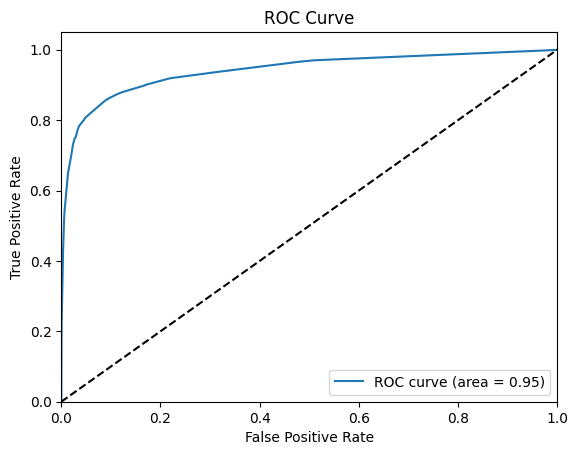

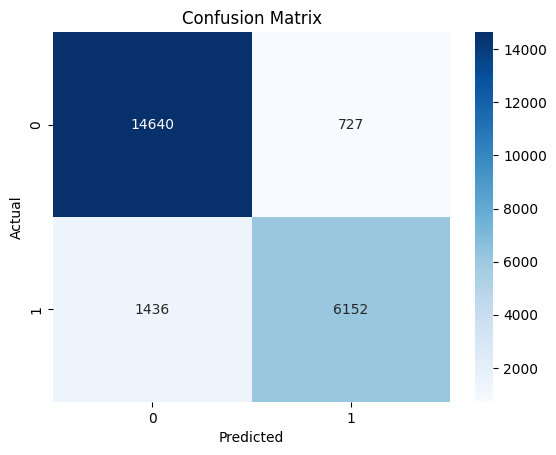

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_CART)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_RL:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(cm_RL, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Curvas de complejidad

Train mean scores: [0.89027464 0.90610705 0.90661582 0.90885626 0.91051325 0.91226359
 0.91449002 0.91744926 0.92108997 0.92540281 0.93036911 0.93572749
 0.94073113 0.94624354 0.95140588 0.95678293 0.96177256 0.96616475
 0.97027689 0.97400628]
Validation mean scores: [0.89027466 0.90610704 0.90661115 0.90879558 0.90972909 0.90974776
 0.90963572 0.90840346 0.90786204 0.9042587  0.90241033 0.90044996
 0.89888165 0.89647318 0.89419543 0.89130153 0.88958385 0.88771686
 0.88504698 0.8831239 ]


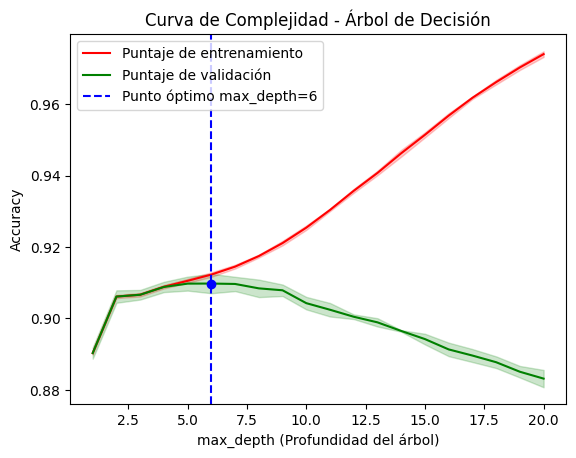

In [ ]:
# Definir un rango para el parámetro max_depth (profundidad máxima del árbol)
param_range = np.arange(1, 21)  # Rango de 1 a 20 para max_depth

# Modelo
model = DecisionTreeClassifier(random_state=321)

# Obtener las curvas de validación
train_scores, val_scores = validation_curve(
    model, X_train, y_train, param_name="max_depth",
    param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

# Calcular promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Imprimir los puntajes para inspección
print("Train mean scores:", train_mean)
print("Validation mean scores:", val_mean)

# Encontrar el índice del mejor valor de max_depth
optimal_idx = np.argmax(val_mean)

# Graficar la curva de complejidad
plt.figure()
plt.plot(param_range, train_mean, label="Puntaje de entrenamiento", color="r")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.plot(param_range, val_mean, label="Puntaje de validación", color="g")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="g", alpha=0.2)

# Marcar el punto óptimo
plt.axvline(param_range[optimal_idx], color='b', linestyle='--', label=f'Punto óptimo max_depth={param_range[optimal_idx]}')
plt.scatter(param_range[optimal_idx], val_mean[optimal_idx], color='b', zorder=5)

plt.title("Curva de Complejidad - Árbol de Decisión")
plt.xlabel("max_depth (Profundidad del árbol)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## Optimizacion


In [ ]:
# Definir el modelo
modelo_tree = DecisionTreeClassifier(random_state=321)

# Definir los parámetros para GridSearch (excluyendo max_depth ya optimizado)
param_grid_tree = {
    'min_samples_split': [5,10, 20],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1,5, 10],  # Mínimo de muestras por hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número máximo de características para dividir
    'criterion': ['gini', 'entropy']  # Función para medir la calidad de la división
}

# Crear GridSearchCV
grid_search_tree = GridSearchCV(estimator=modelo_tree, param_grid=param_grid_tree,
                                scoring='accuracy', cv=5, n_jobs=-1)

# Ajustar el modelo con max_depth fijo en 6
modelo_tree.set_params(max_depth=6)
grid_search_tree.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados (sin max_depth)
print("Mejores parámetros encontrados:", grid_search_tree.best_params_)

# Modelo final con los mejores parámetros
modelo_optimizado_tree = grid_search_tree.best_estimator_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10}


{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10} parametros encontrados para CART

# Ensamble de modelos

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Volver a entrenar los modelos optimizados con todos los datos de entrenamiento
modelo_optimizado_RL.fit(X_train, y_train)
modelo_optimizado_SVM.fit(X_train, y_train)
modelo_optimizado_tree.fit(X_train, y_train)

# Hacer predicciones con los modelos individuales
y_pred_RL = modelo_optimizado_RL.predict(X_test)
y_pred_DTC = modelo_optimizado_tree.predict(X_test)
y_pred_SVM = modelo_optimizado_SVM.predict(X_test)

# Evaluar la performance de los modelos individuales
print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_pred_RL)}")
print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred_DTC)}")
print(f"SVM accuracy: {accuracy_score(y_test, y_pred_SVM)}")

# Crear el modelo de Voting (votación dura o mayoritaria) con los tres modelos
voting_clf = VotingClassifier(estimators=[
    ('lr', modelo_optimizado_RL),
    ('dt', modelo_optimizado_tree),
    ('svm', modelo_optimizado_SVM)], voting='hard')

# Entrenar el modelo de Voting
voting_clf.fit(X_train, y_train)

# Hacer predicciones con el modelo de Voting
y_pred_voting = voting_clf.predict(X_test)

# Evaluar el desempeño del modelo de Voting
print(f"Voting Classifier accuracy: {accuracy_score(y_test, y_pred_voting)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9113957135389441
Decision Tree accuracy: 0.9093047569262938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier accuracy: 0.9099146192716501
